<a href="https://colab.research.google.com/github/Shreyas-s14/io-CV-DL/blob/main/PESU_I_O_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 5.5MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp37-none-any.whl size=73269 sha256=b4e88fba467b2a5c21e5b8a667e61ff3caec7ecb3d91de2d856630fe8888b026
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"inagana","key":"da1f31980e463050b645d7c2c1999ff0"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d tongpython/cat-and-dog

 96% 209M/218M [00:03<00:00, 85.6MB/s]
100% 218M/218M [00:03<00:00, 60.4MB/s]


In [ ]:
! unzip cat-and-dog.zip -d dataset

# CNN model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/dataset/training_set/training_set"
test_path = "/content/dataset/test_set/test_set"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (200,200),
    batch_size = 32
)


Found 8005 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size = (200,200),
    batch_size = 32
)

Found 2023 files belonging to 2 classes.


In [ ]:
CNNmodel = tf.keras.models.Sequential()

# Feature extraction part
CNNmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Neural network - For classification
CNNmodel.add(tf.keras.layers.Flatten())
CNNmodel.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
CNNmodel.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 46, 46, 64)        36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)              

In [ ]:
CNNmodel.compile(optimizer = 'adam',
                loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = CNNmodel.fit(train_dataset, validation_data=test_dataset, epochs = 15)

Epoch 1/15
251/251 [==============================] - 38s 147ms/step - loss: 37.5360 - accuracy: 0.5015 - val_loss: 0.6880 - val_accuracy: 0.5284
Epoch 2/15
251/251 [==============================] - 37s 145ms/step - loss: 0.6791 - accuracy: 0.5616 - val_loss: 0.6912 - val_accuracy: 0.5383
Epoch 3/15
251/251 [==============================] - 37s 148ms/step - loss: 0.6057 - accuracy: 0.6311 - val_loss: 0.7222 - val_accuracy: 0.5111
Epoch 4/15
251/251 [==============================] - 39s 152ms/step - loss: 0.5134 - accuracy: 0.7227 - val_loss: 0.8432 - val_accuracy: 0.5210
Epoch 5/15
251/251 [==============================] - 39s 155ms/step - loss: 0.4177 - accuracy: 0.7826 - val_loss: 1.0649 - val_accuracy: 0.5477
Epoch 6/15
251/251 [==============================] - 39s 155ms/step - loss: 0.3539 - accuracy: 0.8290 - val_loss: 1.2871 - val_accuracy: 0.5240
Epoch 7/15
251/251 [==============================] - 39s 153ms/step - loss: 0.2756 - accuracy: 0.8676 - val_loss: 1.4560 - val_a

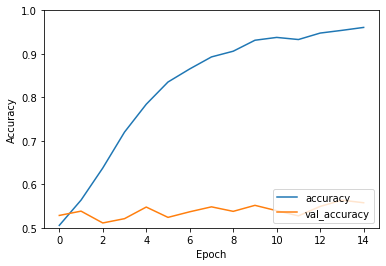

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

Here we notice overfitting, so we try to solve it

## Solving Overfitting with Data Augmentation

In [ ]:
#Use ImageDataGenerator to do augmentation
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

In [ ]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 8005 images belonging to 2 classes.


In [ ]:
test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 2023 images belonging to 2 classes.


In [ ]:
CNNmodel_aug = tf.keras.models.Sequential()

# Feature extraction part
CNNmodel_aug.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
CNNmodel_aug.add(tf.keras.layers.MaxPooling2D((2,2)))
CNNmodel_aug.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Neural network - For classification
CNNmodel_aug.add(tf.keras.layers.Flatten())
CNNmodel_aug.add(tf.keras.layers.Dense(32, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(64, activation='relu'))
CNNmodel_aug.add(tf.keras.layers.Dense(2, activation='softmax'))

#Compile
CNNmodel_aug.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history2 = CNNmodel_aug.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 15)

Epoch 1/15
251/251 [==============================] - 119s 472ms/step - loss: 0.7494 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/15
251/251 [==============================] - 118s 472ms/step - loss: 0.6936 - accuracy: 0.5026 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 3/15
251/251 [==============================] - 118s 469ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 4/15
251/251 [==============================] - 118s 470ms/step - loss: 0.6933 - accuracy: 0.5003 - val_loss: 0.6932 - val_accuracy: 0.4998
Epoch 5/15
251/251 [==============================] - 118s 469ms/step - loss: 0.6934 - accuracy: 0.5112 - val_loss: 0.6931 - val_accuracy: 0.5012
Epoch 6/15
251/251 [==============================] - 117s 468ms/step - loss: 0.6925 - accuracy: 0.5145 - val_loss: 0.6926 - val_accuracy: 0.5111
Epoch 7/15
251/251 [==============================] - 117s 468ms/step - loss: 0.6890 - accuracy: 0.5382 - val_loss: 0.6838 -

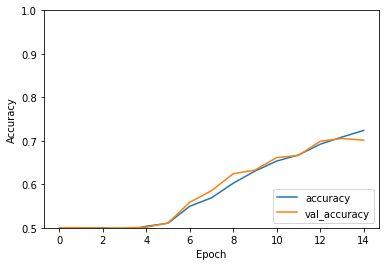

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

### Data augmentation

* We can **overcome overfitting** by adding more data
* If we cannot add more data, we can create data from existing data by rotating it, or flipping it and so on.
* Here, we used `ImageDataGenerator` to augemnt data

#### Observation

We can observe that though we trained CNN-1 and CNN-2 for 15 epochs with the same architecture, there is no overfitting in CNN-2

That is because we used data augmentation for CNN-2